In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from data.csv file
df = pd.read_csv('Dummy_Month.csv')
df.head()

,Unnamed: 0,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1,1002,Present,0,0,Wednesday,2021-08-04
2,2,1003,Present,0,0,Wednesday,2021-08-04
3,3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,4,1005,Present,0,0,Wednesday,2021-08-04


In [3]:
#The amount of observations (rows) and characteristics(columns) in a dataset
print ('The Total Rows in the dataset = ' + str(df.shape[0]))
print ('The Total Columns in the dataset = ' + str(df.shape[1]))

The Total Rows in the dataset = 13440
The Total Columns in the dataset = 7


In [4]:
Bay_ID = (df['Bay_id'] == 1001)
Multiple_Bay_ID = (df['Bay_id'].isin([1001, 1003, 1005]))
Parking_Status = (df['Status'] == 'Present')
Day_Of_Week = (df['DayOfWeek'] == 'Wednesday')
Date = (df['Date'] == '2021-08-04')
Hour = (df['Hour'] == 10)

## 7-Day Expected Parking Availability

In [5]:
CountStatus = df.loc[Multiple_Bay_ID & Parking_Status].groupby('Status').DayOfWeek.value_counts().unstack(0)

CountStatus = CountStatus.reset_index()
CountStatus['Present'] = (CountStatus['Present'] / 4).round(0)
CountStatus.columns = ['Day', 'Mean_Parking_Availabilities']
CountStatus = CountStatus.set_index('Day').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

CountStatus

,Day,Mean_Parking_Availabilities
0,Monday,144.0
1,Tuesday,145.0
2,Wednesday,145.0
3,Thursday,149.0
4,Friday,142.0
5,Saturday,138.0
6,Sunday,137.0


In [6]:
Currentday_Count = df.loc[Multiple_Bay_ID & Parking_Status & Date].groupby('Status').DayOfWeek.value_counts().unstack(0)
Currentday_Count = Currentday_Count.reset_index()
Currentday_Count.columns = ['Day', 'Parking_Availabilities']

Day_of_Choice = Currentday_Count.iloc[0,0]

Currentday_Count

,Day,Parking_Availabilities
0,Wednesday,139


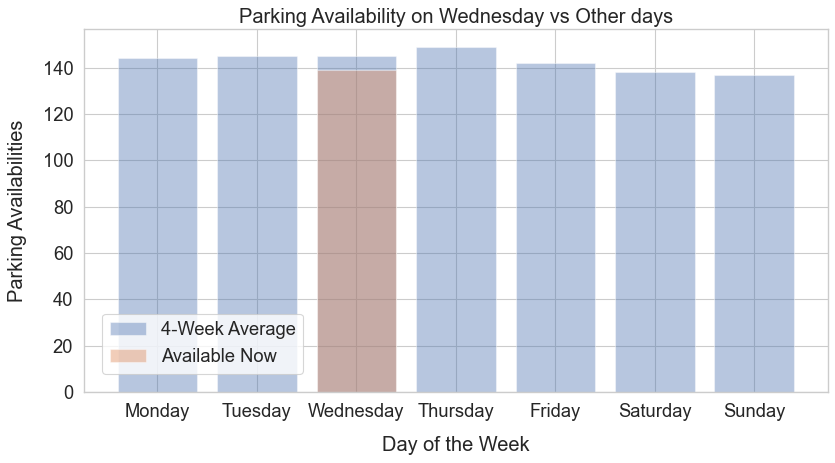

In [7]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=80)
sns.set_style("whitegrid")

plt.ylabel("Parking Availabilities", labelpad=14)
plt.xlabel("Day of the Week", labelpad=14)
plt.title(f"Parking Availability on {Day_of_Choice} vs Other days", y=1)

plt.bar(CountStatus['Day'], CountStatus['Mean_Parking_Availabilities'],alpha=0.4 , label="4-Week Average")
plt.bar(Currentday_Count['Day'], Currentday_Count['Parking_Availabilities'],alpha=0.4, label="Available Now")

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()

## 24-Hour Expected Parking Availability (Same Day of the Week)

In [8]:
HourStatus = df.loc[Multiple_Bay_ID & Parking_Status & Day_Of_Week].groupby('Status').Hour.value_counts().unstack(0)

HourStatus = HourStatus.reset_index()
HourStatus['Present'] = (HourStatus['Present'] / 4).round(1)
HourStatus.columns = ['Hour_Of_Day', 'Mean_Parking_Availabilities']

HourStatus

,Hour_Of_Day,Mean_Parking_Availabilities
0,0,6.8
1,1,4.8
2,2,6.5
3,3,6.0
4,4,5.5
5,5,6.0
6,6,6.0
7,7,4.5
8,8,6.0
9,9,7.5


In [9]:
Wednesday_HourCount = df.loc[Multiple_Bay_ID & Parking_Status & Date & Day_Of_Week & Hour].groupby('Status').Hour.value_counts().unstack(0)
Wednesday_HourCount = Wednesday_HourCount.reset_index()
Wednesday_HourCount.columns = ['Hour_Of_Day', 'Parking_Availabilities']
Wednesday_HourCount

,Hour_Of_Day,Parking_Availabilities
0,10,7


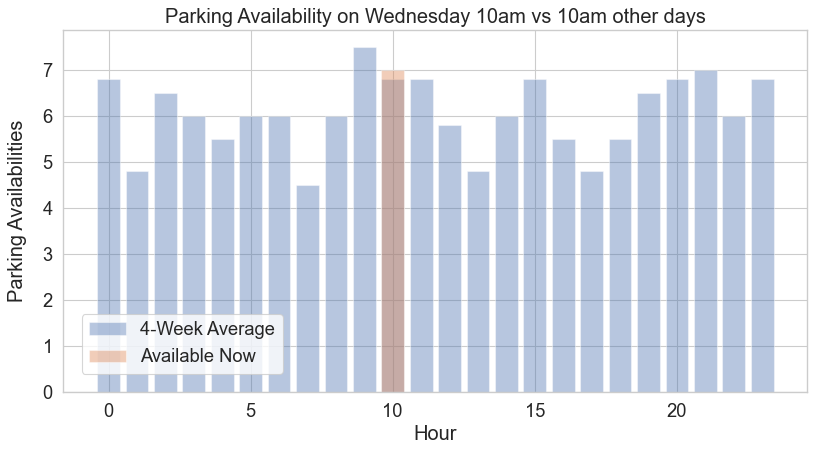

In [17]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=80)
sns.set_style("whitegrid")

plt.ylabel("Parking Availabilities", labelpad=14)
plt.xlabel("Hour")
plt.title("Parking Availability on Wednesday 10am vs 10am other days", y=1)

plt.bar(HourStatus['Hour_Of_Day'], HourStatus['Mean_Parking_Availabilities'],alpha=0.4, label="4-Week Average")
plt.bar(Wednesday_HourCount['Hour_Of_Day'], Wednesday_HourCount['Parking_Availabilities'],alpha=0.4, label="Available Now")

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()

## 24-Hour Expected Parking Availability (DIfferent Day of the Week)

In [11]:
DifferentDay_HourStatus = df.loc[Multiple_Bay_ID & Parking_Status].groupby('Status').Hour.value_counts().unstack(0)

DifferentDay_HourStatus = DifferentDay_HourStatus.reset_index()
DifferentDay_HourStatus['Present'] = (DifferentDay_HourStatus['Present'] / 28).round(1)
DifferentDay_HourStatus.columns = ['Hour_Of_Day', 'Mean_Parking_Availabilities']

DifferentDay_HourStatus

,Hour_Of_Day,Mean_Parking_Availabilities
0,0,5.5
1,1,5.9
2,2,6.6
3,3,6.1
4,4,6.0
5,5,6.0
6,6,6.0
7,7,5.8
8,8,6.2
9,9,5.9


In [12]:
DifferentDay_Wednesday_HourCount = df.loc[Multiple_Bay_ID & Parking_Status & Date & Day_Of_Week & Hour].groupby('Status').Hour.value_counts().unstack(0)
DifferentDay_Wednesday_HourCount = DifferentDay_Wednesday_HourCount.reset_index()
DifferentDay_Wednesday_HourCount.columns = ['Hour_Of_Day', 'Parking_Availabilities']
DifferentDay_Wednesday_HourCount

,Hour_Of_Day,Parking_Availabilities
0,10,7


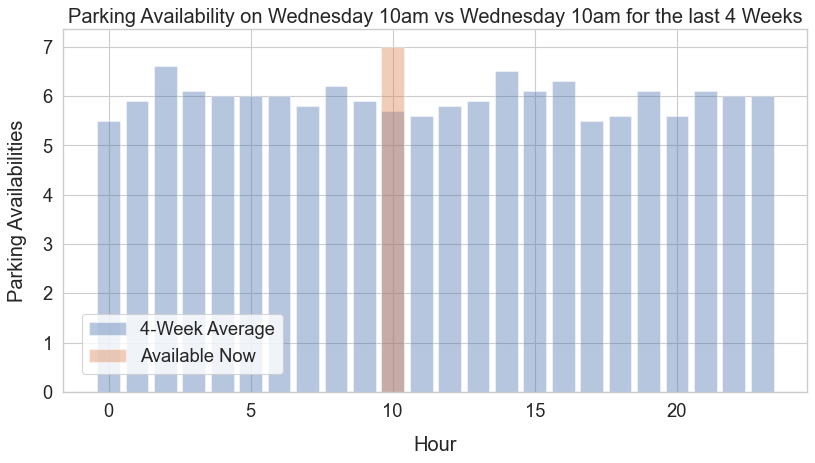

In [13]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=80)
sns.set_style("whitegrid")

plt.ylabel("Parking Availabilities", labelpad=14)
plt.xlabel("Hour", labelpad=14)
plt.title("Parking Availability on Wednesday 10am vs Wednesday 10am for the last 4 Weeks", y=1)

plt.bar(DifferentDay_HourStatus['Hour_Of_Day'], DifferentDay_HourStatus['Mean_Parking_Availabilities'],alpha=0.4, label="4-Week Average")
plt.bar(DifferentDay_Wednesday_HourCount['Hour_Of_Day'], DifferentDay_Wednesday_HourCount['Parking_Availabilities'],alpha=0.4, label="Available Now")

plt.legend(loc ="lower left", borderaxespad=1)

plt.show()